## __Import Library__

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Dataset yang digunakan yaitu data hotel booking dari https://www.kaggle.com/jessemostipak/hotel-booking-demand/data. Data yang dipakai hanya sejumlah 5000 baris, dan kolom yang digunakan hanya ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df = df.iloc[:5000]
df = df[['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]
df.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


## __A. Data Cleaning & Preprocessing__

### __Checking Missing Value__

In [3]:
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        2
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

Pada Feature 'country' terdapat data kosong. Feature 'country' bisa kita isi dengan data (negara) yang paling sering muncul (modus/mode).

#### __Mengisi data kosong__

In [4]:
df['country'].mode()

0    PRT
dtype: object

In [5]:
df['country'].fillna('PRT', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      5000 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

### __Detecting Wrong Values__

In [7]:
for i in df.columns:
    print(i, df[i].unique())

hotel ['Resort Hotel']
is_canceled [0 1]
adults [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children [ 0.  1.  2. 10.]
babies [0 1 2]
meal ['BB' 'FB' 'HB' 'SC' 'Undefined']
country ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN']
market_segment ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups']
distribution_channel ['Direct' 'Corporate' 'TA/TO']
reserved_room_type ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P']
booking_changes [ 3  4  0  1  2  5 17  6]
deposit_type ['No Deposit' 'Refundable' 'Non Refund']
days_in_waiting_list [  0  50  47  65 122]
customer_type ['Transient' 'Contract' 'Transient-Party' 'Group']
required_car_parking_spaces [0 1 2]
total_of_special_requests [0 1 3 2 4]


Beradasarkan penjelasan tentang feature yang ada di dataset, sumber: https://www.sciencedirect.com/science/article/pii/S2352340918315191. Ada value pada feature 'meal' yang memiliki kesamaan dalam valuenya, yaitu 'Undefine' dan 'SC', maka kita dapat mengisi feature 'meal' yang valuenya 'Undefined' menjadi 'SC'  

In [8]:
df['meal'].value_counts()

BB           3418
HB           1037
FB            319
Undefined     212
SC             14
Name: meal, dtype: int64

In [9]:
df1 = df.copy()

In [10]:
df1['meal'] = df1['meal'].replace(['Undefined'], 'SC')

In [11]:
df1['meal'].value_counts()

BB    3418
HB    1037
FB     319
SC     226
Name: meal, dtype: int64

### __Detecting Outliers__

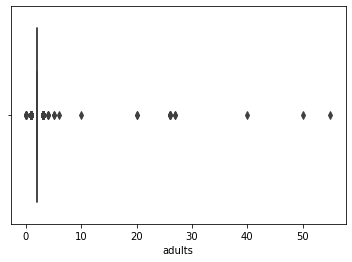

In [13]:
sns.boxplot(x='adults', data=df1)

In [20]:
df1[df1['adults']==0]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
2224,Resort Hotel,0,0,0.0,0,SC,PRT,Corporate,Corporate,A,1,No Deposit,0,Transient-Party,0,0
2409,Resort Hotel,0,0,0.0,0,SC,PRT,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
3181,Resort Hotel,0,0,0.0,0,SC,ESP,Groups,TA/TO,A,0,No Deposit,0,Transient-Party,0,0
3684,Resort Hotel,0,0,0.0,0,SC,PRT,Groups,TA/TO,A,1,No Deposit,122,Transient-Party,0,0
3708,Resort Hotel,0,0,0.0,0,SC,PRT,Groups,TA/TO,A,1,No Deposit,122,Transient-Party,0,0
4127,Resort Hotel,1,0,0.0,0,SC,PRT,Offline TA/TO,TA/TO,P,0,No Deposit,0,Transient,0,0


Jika melihat pada grafik boxplot di feature 'adults', ada outlier yang perlu diperhatikan. Untuk data customer yang memiliki value 'adults' di atas 5, dapat diartikan sebagai outlier jika mengacu pada boxplot, tetapi hal ini masih masuk akal mengingat jumlah 'adults' itu memang pesanan dari customer, bisa saja pesanan tersebut berasa dari corporate yang memang mempunyai anggota 'adults' yang banyak.

Yang perlu diperhatikan adalah pesanan hotel yang tidak memiliki nilai 'adults' atau 0. Menurut saya ini tidak masuk akal, dan bisa jadi kesalahan dalam data. Tindakan yang saya lakukan yaitu menghilangkan data nya, karna datanya hanya berjumlah 6 saja, jadi kita tidak kehilangan banyak informasi.

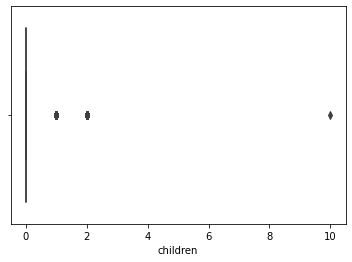

In [14]:
sns.boxplot(x='children', data=df1)

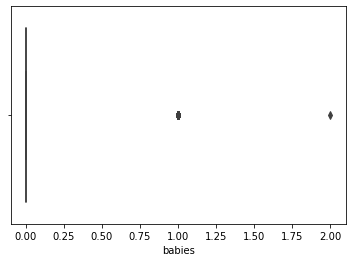

In [15]:
sns.boxplot(x='babies', data=df1)

Pada data di kolom 'children' dan 'babies' melalui grafik boxplot, value datanya masih dikatakan masuk akal. Jadi tidak ada tindakan lanjutan seperti yang akan dilakukan pada feature 'adults'

In [23]:
df2 = df1.drop(df1[df1['adults']==0].index)
df2.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [24]:
df2[df2['adults']==0]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests


In [26]:
df2.shape

(4994, 16)

## __B. Exploratory Data Analysis__

### __1. Customer Profiling__

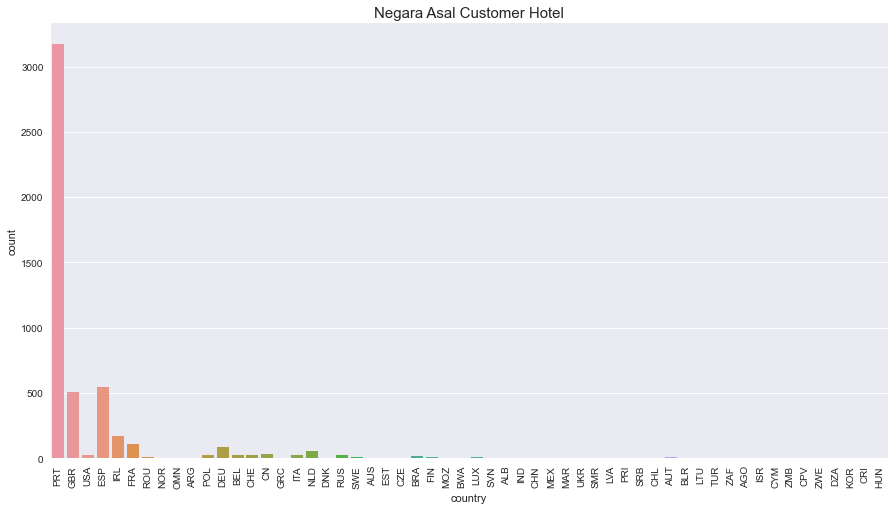

In [39]:
plt.style.use('seaborn')
plt.figure(figsize=(15,8))
sns.countplot(x="country", data=df2)
plt.xticks(rotation=90)
plt.title('Negara Asal Customer Hotel', size=15)

plt.show()

Customer hotel sebagian besar berasal  adalah warga lokal dari negara Portugal yang sama dengan lokasi hotel tersebut, customer lainnya yang memesan hotel berasal dari negara eropa lainnya di sekitar portugal. Tidak banyak customer yang berasal dari luar eropa, hanya ada beberapa customer yang berasal dari USA.

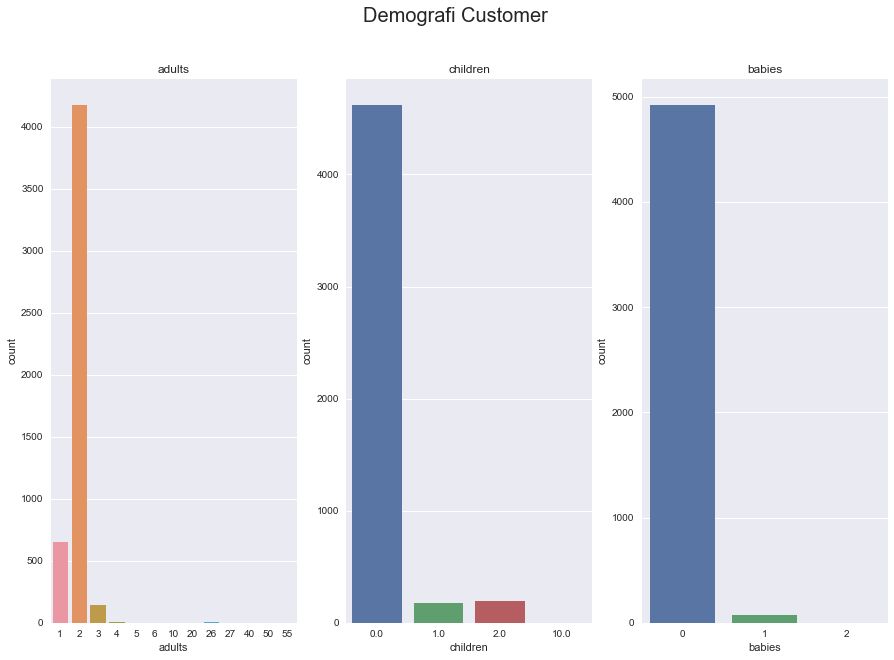

In [97]:
plt.figure(figsize=(15,10))

plt.suptitle('Demografi Customer', fontsize=20)
plt.subplot(131)
sns.countplot(x="adults", data=df2)
plt.title('adults')

plt.subplot(132)
sns.countplot(x="children", data=df2)
plt.title('children')

plt.subplot(133)
sns.countplot(x="babies", data=df2)
plt.title('babies')

plt.show()

- Jika melihat grafik di atas, nilai adult tertinggi yaitu 2, children 0, dan babies 0. Berdasarkan hal tersebut dapat dikatakan sebagian besar customer hotel adalah pasangan suami istri atau pasangan baru yang ingin honeymoon, mengingat jenis hotelnya yaitu resort hotel, yang cocok untuk melakukan honey moon.

- Namun ada juga beberapa customer yang termasuk berkeluarga. Hal ini dapat dilihat dengan adanya nilai dari children dan babies.

- Ada juga customer hotel yang memiliki nilai 'adults'-nya diatas 10 orang. Customer bisa dikatakan customer yang memiliki keluarga besar atau customer dari perusahaan/company. Beberapa perusahaan sering melakukan pertemuan/acara outing di hotel.

### __2. Customer Behavior__

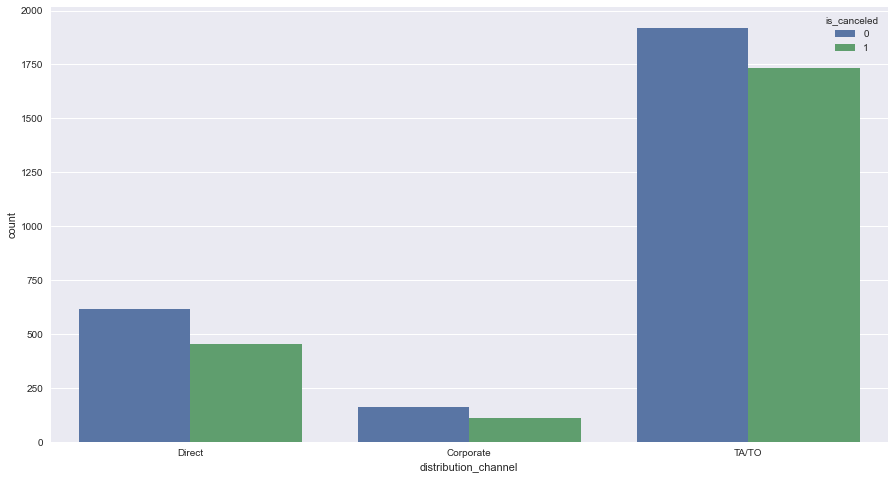

In [96]:
plt.style.use('seaborn')
plt.figure(figsize=(15,8))
sns.countplot(x="distribution_channel",hue='is_canceled', data=df2)

plt.show()

Customer yang menggunakan Travel Agent/Travel Operator paling sering melakukan pembatalan terhadap pesanan hotelnya. Hal ini mungkin terjadi dengan adanya penawaran harga yang lebih murah dari hotel lain yang diberikan kepada customer melalu travel agent, sehingga customer membatalkan pesanan tersebut.

## __C. Model Building__

In [59]:
df3 = df2.drop(['hotel', 'country'], axis=1)
df3.head(2)

,is_canceled,adults,children,babies,meal,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,2,0.0,0,BB,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,0,2,0.0,0,BB,Direct,Direct,C,4,No Deposit,0,Transient,0,0


Melakukan drop kolom 'country' dan 'hotel' karna dianggap tidak ada pengaruh dalam pembuatan model machine learning

### __Label Encoder on Categorical Feature__

Pada dataset ini terdapat banyak fitur categorical, sehingga dibutuhkan label encoder.

In [60]:
df3.head(2)

,is_canceled,adults,children,babies,meal,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,2,0.0,0,BB,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,0,2,0.0,0,BB,Direct,Direct,C,4,No Deposit,0,Transient,0,0


In [61]:
df3.dtypes

is_canceled                      int64
adults                           int64
children                       float64
babies                           int64
meal                            object
market_segment                  object
distribution_channel            object
reserved_room_type              object
booking_changes                  int64
deposit_type                    object
days_in_waiting_list             int64
customer_type                   object
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

In [66]:
cat_col = ['is_canceled','meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
df3[cat_col] = df[cat_col].astype('category')
num_col = ['adults', 'children', 'babies', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

Mengubah jenis fitur yang belum kategorical menjadi type categorical

In [67]:
df4 = df3[cat_col+num_col]
df4.head()

,is_canceled,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,0,BB,Direct,Direct,C,No Deposit,Transient,2,0.0,0,3,0,0,0
1,0,BB,Direct,Direct,C,No Deposit,Transient,2,0.0,0,4,0,0,0
2,0,BB,Direct,Direct,A,No Deposit,Transient,1,0.0,0,0,0,0,0
3,0,BB,Corporate,Corporate,A,No Deposit,Transient,1,0.0,0,0,0,0,0
4,0,BB,Online TA,TA/TO,A,No Deposit,Transient,2,0.0,0,0,0,0,1


Menggabungkan kedua fitur categorical dan numerical kedalam 1 df = df4

__Membuat dummies pada setiap kolom categorical__

In [69]:
df_dummies = pd.get_dummies(df4.drop(columns=['is_canceled']))

In [70]:
df_dummies.head()

,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,meal_BB,meal_FB,meal_HB,...,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,2,0.0,0,3,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2,0.0,0,4,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0.0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0.0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2,0.0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


## __Splitting Dataset__

In [71]:
from sklearn.model_selection import train_test_split

In [74]:
x = df_dummies
y = df4['is_canceled']

In [75]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)

### __Evaluation Matrix__

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

### __Logistic Regression__

Ide dari Logistic Regression adalah mencari hubungan antara fitur-fitur dengan probabilitas dari hasil yang didapatkan

In [80]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_LR = log_reg.predict(x_test)

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_LR))
print(confusion_matrix(y_test, y_pred_LR))
print(classification_report(y_test,y_pred_LR))

Accuracy: 0.7187
[[388 159]
 [122 330]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       547
           1       0.67      0.73      0.70       452

    accuracy                           0.72       999
   macro avg       0.72      0.72      0.72       999
weighted avg       0.72      0.72      0.72       999



### __Decission Tree__

Konsepnya adalah mengubah data menjadi pohon keputusan dan aturan-aturan keputusannya. Decision Tree dapat membreakdown keputusan yang kompleks menjadi lebih simple.

In [81]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_DT = dt.predict(x_test)

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_DT))
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test,y_pred_DT))

Accuracy: 0.7347
[[381 166]
 [ 99 353]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       547
           1       0.68      0.78      0.73       452

    accuracy                           0.73       999
   macro avg       0.74      0.74      0.73       999
weighted avg       0.74      0.73      0.74       999



### __Random Forest__

Model ini hampir sama dengan decission tree tetapi random forest cocok untuk digunakan pada dataset yang lebih besar. Random forest menggabungkan beberapa pohon (tree) dan melakukan training pada data. Semakin banyak penggunaan tree nya maka hasil yang didapatkan akan lebih baik.

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_RF = rf.predict(x_test)

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_RF))
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test,y_pred_RF))

Accuracy: 0.7347
[[375 172]
 [ 93 359]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       547
           1       0.68      0.79      0.73       452

    accuracy                           0.73       999
   macro avg       0.74      0.74      0.73       999
weighted avg       0.74      0.73      0.74       999



**Dari ketiga model classification yang digunakan, model random forest dan decission tree memberikan performa yang hampir sama, hanya berbeda sedikit pada nilai precision 0 di model random forest yang lebih tinggi.**

## __D. Model Evaluation__

### __Confussion Matrix__

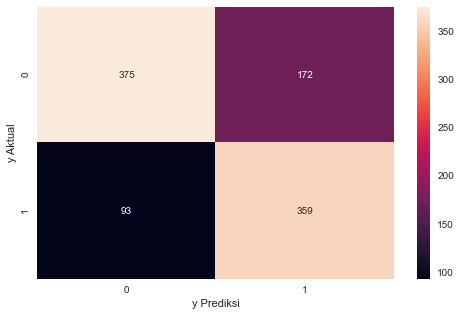

In [84]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

TN = 375
TP = 359
FP = 172
FN = 93

Jenis Kesalahan yang dipilih:

- Model memprediksi user tidak membatalkan pesanan, padahal sebenarnya/realisasinya user cancel booking (membatalkan pesanan).
- Kesalahan tersebut termasuk FN (False Negatif)

**D1**. Jenis kesalahan FN dalam model ini merugikan hotel. Karena jika ini terjadi artinya ada kamar yang seharusnya ditempati menjadi tidak ditempati karena salah prediksi. Pada hari tersebut, pihak hotel menjadi rugi dan kehilangan kesempatan dalam menawarkan kamar yang cancel kepada customer yang lain. Kerugian lainnya misalkan kamar tersebut sudah dipersiapkan fasilitasnya seperti makanan dan minuman untuk penyambutan, tapi karna salah prediksi, makanan dan minuman tersebut jadi terlantarkan (mubazir). Biasanya ada customer yang ingin dijemput oleh pihak hotel di bandara, jika terjadi salah prediksi, maka pihak hotel dapat merugi dalam biaya transportasi.   

**D2**. Pada kesalahan FN kita dapat meningkatkan nilai pada TN (True Negatif), agar nilai precision 0 menjadi lebih tinggi.

**D3**. Untuk meningkatkan performa model dalam menekan jenis kesalahan FN, dapat digunakan penambahan data yang hasilnya negatif (0), agar model dapat mempelajari lebih banyak lagi dalam data training. Selain itu bisa juga digunakan Hyperparameter Tuning untuk meningkatkan performa model.

In [85]:
y.value_counts()

0    2697
1    2297
Name: is_canceled, dtype: int64

## __C. Hyperparameter Tuning__

In [86]:
# parameter model RandomForest yang akan dituning dan value di setiap parameter

max_depth = [20,50,100]
min_samples_leaf = [1,2,4]
min_samples_split = [2,5,10]
n_estimators = [200,800,1400]
# simpan dalam variabel
param = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split, 'n_estimators':n_estimators}
param

{'max_depth': [20, 50, 100],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 800, 1400]}

## __Grid Search CV__

In [87]:
from sklearn.model_selection import GridSearchCV

In [89]:
model_RF = RandomForestClassifier()
model_RF_GS = GridSearchCV(model_RF, param, cv=3)

In [91]:
model_RF_GS.fit(x_train, y_train)
model_RF_GS.best_params_

{'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 800}

### Before Tuning

In [93]:
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_RF))
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test,y_pred_RF))

Accuracy: 0.7347
[[375 172]
 [ 93 359]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       547
           1       0.68      0.79      0.73       452

    accuracy                           0.73       999
   macro avg       0.74      0.74      0.73       999
weighted avg       0.74      0.73      0.74       999



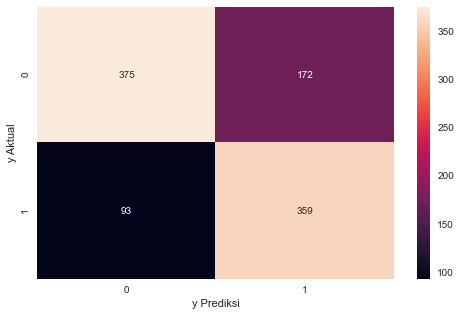

In [95]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

### After Tuning

In [92]:
rf2 = RandomForestClassifier(n_estimators= 800, min_samples_split= 5, min_samples_leaf= 2, max_depth=50)
rf2.fit(x_train, y_train)
y_pred_RF2 = rf2.predict(x_test)

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_RF2))
print(confusion_matrix(y_test, y_pred_RF2))
print(classification_report(y_test,y_pred_RF2))

Accuracy: 0.7317
[[390 157]
 [111 341]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       547
           1       0.68      0.75      0.72       452

    accuracy                           0.73       999
   macro avg       0.73      0.73      0.73       999
weighted avg       0.74      0.73      0.73       999



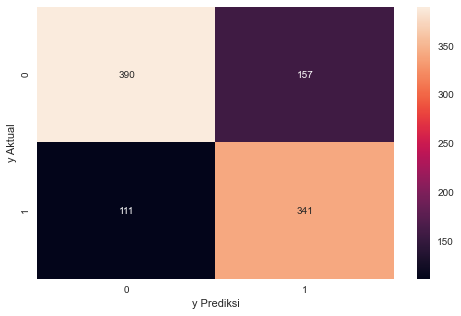

In [94]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_RF2), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

__Setelah dilakukan hyperparameter tuning, model after tuning memang memberikan nilai TN yang lebih tinggi, tetapi nilai FN nya juga ikut bertambah, dapat dilihat pada heatmap confusion matrixnya. Hal ini mempengaruhi dalam nilai precision negatif (0) pada model setelah tuning yang menjadi lebih rendah dibandingkan dengan model sebelum tuning.__

__Cara yang tepat untuk meningkatkan nilai TN memang perlu adanya penambahan dataset yang memiliki nilai negatif lebih banyak.__